4. You have 137 passengers booked on a flight from Las Vegas to Dallas. However, it is Las Vegas on a Sunday morning and you estimate each passenger is 40% likely to not show up.\
You are trying to figure out how many seats to overbook so the plane does not fly empty.\
How likely is it at least 50 passengers will not show up?

Scipy realisation of Binomial distribution

In [5]:
from scipy.stats import binom

n=137
p=.40
p_50_or_more_noshows = 0.0 

for x in range(50,138):
    p_50_or_more_noshows += binom.pmf(x, n, p)
    
print(p_50_or_more_noshows) # 0.822095588147425

0.822095588147425


Using a binomial distribution from scratch, exploring ranges of passengers

In [25]:
# Factorials multiply consecutive descending integers down to 1 # EXAMPLE: 5! = 5 * 4 * 3 * 2 * 1
def factorial(n: int):
    f=1
    for i in range(n):
        f*=(i+1) 
    return f

# Generates the coefficient needed for the binomial distribution
def binomial_coefficient(n: int, k: int):
    return factorial(n) / (factorial(k) * factorial(n - k))

# Binomial distribution calculates the probability of k events out of n trials 
# given the p probability of k occurring
def binomial_distribution(k: int, n: int, p: float):
    return binomial_coefficient(n, k) * (p ** k) * (1.0 - p) ** (n - k)

n=137 # number of trials
p=0.4 # success probability for each trial

noshow_passengers_high_limit = 71
noshow_passengers_low_limit = 39
count_noshows = 0

passeng_num = []
passeng_prob = []

for k in range(n + 1):
    probability = binomial_distribution(k, n, p)
    print("{0} - {1:.8f}".format(k, probability))
    passeng_num.append(k)
    passeng_prob.append(probability)
    if noshow_passengers_high_limit >= k >= noshow_passengers_low_limit:
        count_noshows += probability

print(f'Probability of passeng. range {noshow_passengers_high_limit} - {noshow_passengers_low_limit} \
that will not show up - {count_noshows}')

0 - 0.00000000
1 - 0.00000000
2 - 0.00000000
3 - 0.00000000
4 - 0.00000000
5 - 0.00000000
6 - 0.00000000
7 - 0.00000000
8 - 0.00000000
9 - 0.00000000
10 - 0.00000000
11 - 0.00000000
12 - 0.00000000
13 - 0.00000000
14 - 0.00000000
15 - 0.00000000
16 - 0.00000000
17 - 0.00000000
18 - 0.00000000
19 - 0.00000000
20 - 0.00000000
21 - 0.00000000
22 - 0.00000000
23 - 0.00000000
24 - 0.00000001
25 - 0.00000003
26 - 0.00000008
27 - 0.00000021
28 - 0.00000054
29 - 0.00000135
30 - 0.00000325
31 - 0.00000748
32 - 0.00001651
33 - 0.00003502
34 - 0.00007141
35 - 0.00014011
36 - 0.00026465
37 - 0.00048161
38 - 0.00084492
39 - 0.00142987
40 - 0.00233546
41 - 0.00368356
42 - 0.00561305
43 - 0.00826728
44 - 0.01177461
45 - 0.01622280
46 - 0.02163040
47 - 0.02792009
48 - 0.03490012
49 - 0.04226000
50 - 0.04958507
51 - 0.05639087
52 - 0.06217454
53 - 0.06647593
54 - 0.06893800
55 - 0.06935580
56 - 0.06770448
57 - 0.06414108
58 - 0.05898031
59 - 0.05264909
60 - 0.04562921
61 - 0.03839835
62 - 0.03137930
63

In [11]:
# visualising our distribution with matplotlib
import matplotlib.pyplot as plt

<BarContainer object of 138 artists>

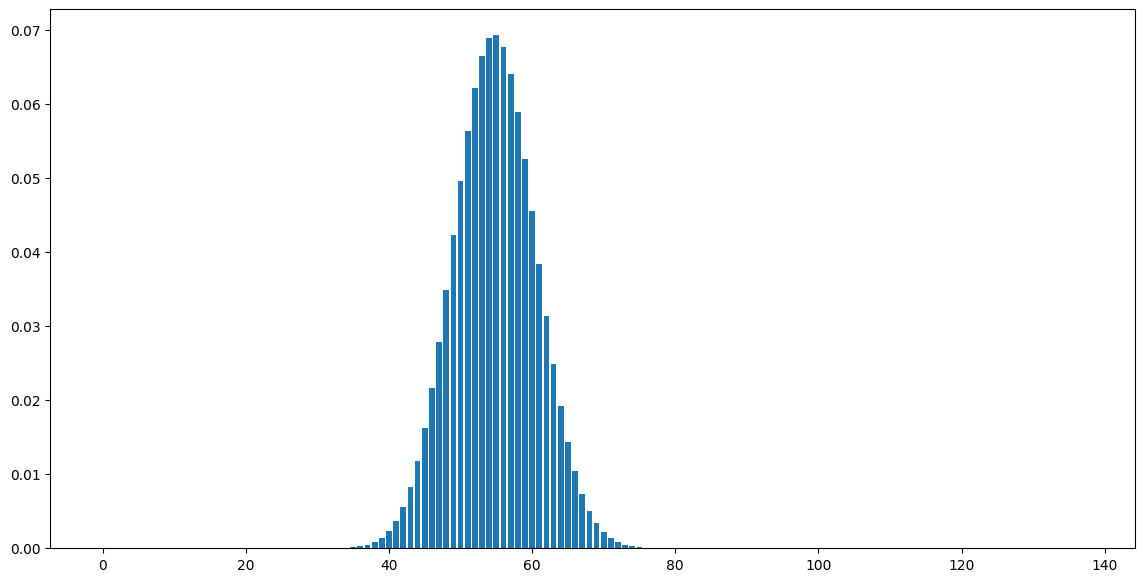

In [23]:
fig, axes = plt.subplots(1, figsize=(14,7))

# position = np.arange(len(passeng_num))

# ax.bar(position, data)
axes.bar(passeng_num, passeng_prob)

# axes.set_xticks(passeng_num)
# ax.set_xticklabels(passeng_prob)

5. You flipped a coin 19 times and got heads 15 times and tails 4 times.\
Do you think this coin has any good probability of being fair? Why or why not?

Using Beta distribution

In [29]:
from scipy.stats import beta

heads=15
tails=4

p_40_60 = beta.cdf(.60, heads, tails) - beta.cdf(.40, heads, tails)
p_at_least_50 = 1 - beta.cdf(.5, heads, tails)

print(f'Probability between 40% and 60% - {p_40_60}')
print(f'Probability above 50% - {p_at_least_50}')


Probability between 40% and 60% - 0.03256646286049279
Probability above 50% - 0.9962310791015625


this coin is highly unlikely to be fair as probability is concenrated above 50% margin.\
Underlying success rate (probability) should be 50%\
\
underlying rate of success(or probability) between 40% and 60% is just around 3,2%\
The top of the distribution (top likelihood, or rate of success) is at 0.8235